In [11]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [2]:
#loading the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train,y_train,X_test,y_test = train_test_split(X,y ,train_size=0.3,random_state=42)

In [4]:
# Initialize the DecisionTreeClassifier with Gini impurity criterion
clf = DecisionTreeClassifier(criterion="gini")



In [5]:
#performing kfold operation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

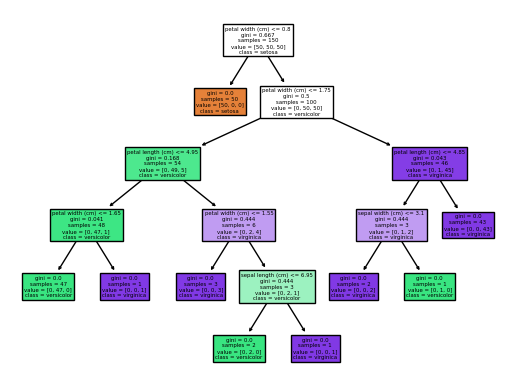

In [6]:
#plot the decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [7]:
#preform kfold cross validation
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(f"Fold {fold_idx + 1}:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

y_pred_test = cross_val_predict(clf, X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

Fold 6:
  Training samples: 125
  Test samples: 25


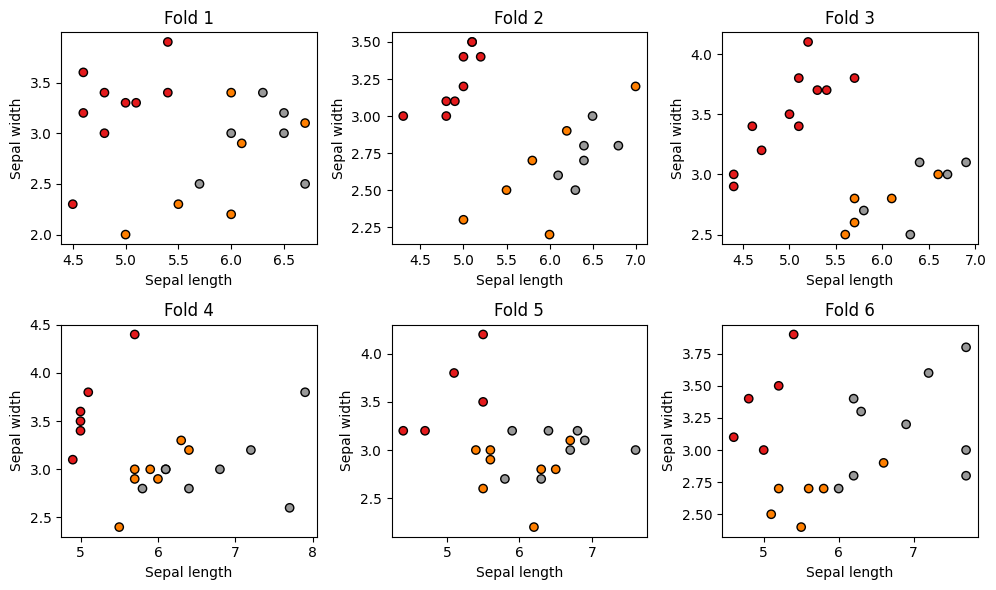

In [8]:
plt.figure(figsize=(10, 6))
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]
    
    clf.fit(X_train_kf, y_train_kf)
    y_pred_kf = clf.predict(X_val_kf)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(X_val_kf[:, 0], X_val_kf[:, 1], c=y_pred_kf, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'Fold {i+1}')

plt.tight_layout()
plt.show()


In [9]:
# Generate and print the classification report
#print("Classification Report:")
#print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

In [10]:
#printing confusion and classification matrix
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[ 5  0  0]
 [ 0  7  1]
 [ 0  1 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.93      0.93        25
weighted avg       0.92      0.92      0.92        25

